<a href="https://colab.research.google.com/github/mountechsolutions/stock-price-forecasting/blob/subha-branch/stockpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving aa.us.txt to aa.us.txt


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['aa.us.txt']))

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1970-01-02,2.2972,2.3178,2.2972,2.2972,26437,0
1,1970-01-05,2.2972,2.2972,2.2544,2.2759,29887,0
2,1970-01-06,2.2759,2.2759,2.2342,2.2342,106900,0
3,1970-01-07,2.2342,2.2342,2.2342,2.2342,85061,0
4,1970-01-08,2.2342,2.2342,2.2139,2.2139,66669,0


In [5]:
df.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
12069,2017-11-06,47.20,47.6800,46.53,47.29,1725638,0
12070,2017-11-07,47.11,47.2042,46.54,46.97,2168351,0
12071,2017-11-08,46.73,46.7700,45.37,45.89,3347930,0
12072,2017-11-09,44.71,44.7100,43.11,43.33,7671810,0
12073,2017-11-10,42.93,44.4600,42.75,43.01,4463839,0


In [6]:
df.shape

(12074, 7)

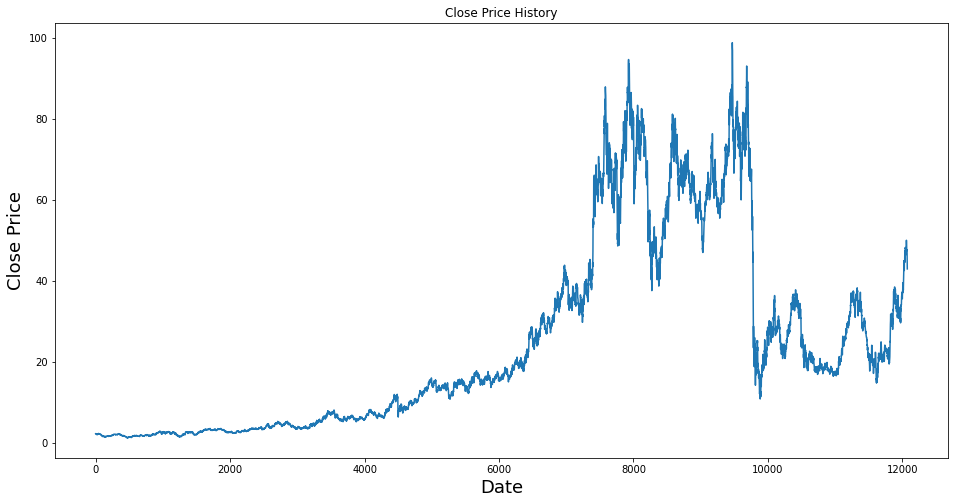

In [7]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [8]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [9]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [10]:
scaled_data

array([[0.01069959],
       [0.01048138],
       [0.01005417],
       ...,
       [0.45729588],
       [0.43106939],
       [0.42779107]])

In [11]:
len(scaled_data)


12074

In [12]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])


In [13]:
len(x_train)
len(y_train)

9600

In [14]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
print(len(x_train[0]))
print(len(x_train))
x_train[0]

60
9600


array([0.01069959, 0.01048138, 0.01005417, 0.01005417, 0.00984621,
       0.00962287, 0.00941388, 0.00962287, 0.00941388, 0.00962287,
       0.00962287, 0.00941388, 0.00962287, 0.01005417, 0.01026112,
       0.00984621, 0.00941388, 0.00897848, 0.00897848, 0.00855947,
       0.00855947, 0.00876949, 0.00919976, 0.00897848, 0.00876949,
       0.00876949, 0.00919976, 0.00897848, 0.00984621, 0.00962287,
       0.00962287, 0.00962287, 0.00941388, 0.00962287, 0.01026112,
       0.01026112, 0.01026112, 0.01048138, 0.01091063, 0.01133272,
       0.01133272, 0.01112372, 0.01133272, 0.01133272, 0.01154683,
       0.01133272, 0.01112372, 0.01112372, 0.01091063, 0.01069959,
       0.01048138, 0.01026112, 0.01026112, 0.00962287, 0.00941388,
       0.00941388, 0.00962287, 0.01069959, 0.01048138, 0.01069959])

In [16]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [17]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [18]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
9600/9600 [==============================] - 331s 34ms/step - loss: 5.9960e-04


In [20]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [21]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [22]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [23]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [24]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.1553338167898597

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


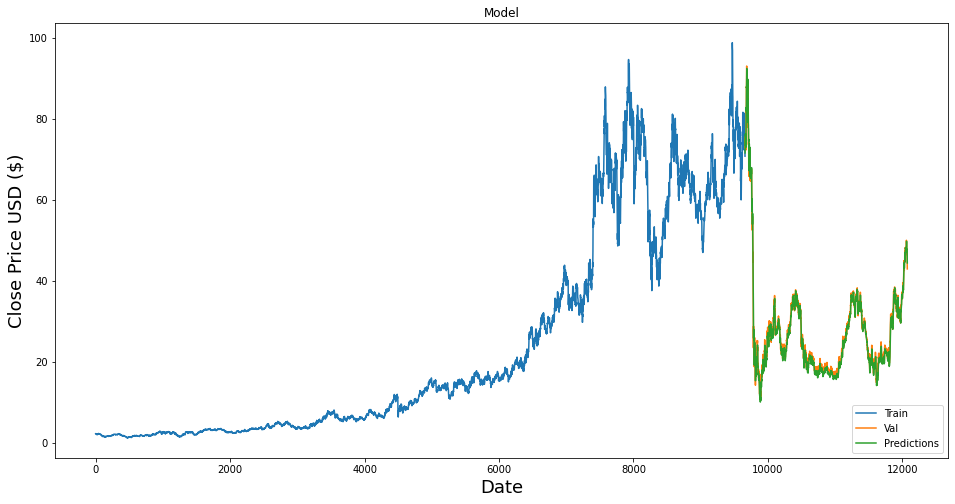

In [25]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
#Show the valid and predicted prices
valid

,Close,Predictions
9660,72.745,71.644257
9661,75.098,72.846176
9662,74.273,75.357246
9663,75.708,75.282448
9664,75.685,76.253555
...,...,...
12069,47.290,47.500069
12070,46.970,47.523628
12071,45.890,47.337280
12072,43.330,46.523552
